In [3]:
import os
import zipfile
import random
from pathlib import Path
from shutil import copyfile, rmtree

# Define the paths for the datasets
base_path = Path(r'C:\Users\Test\Desktop\ProjectAI')
classes = ['bird', 'fish', 'mammal']
dataset_splits = ['train', 'validation', 'test']

# Create directories for training, validation, and testing
for split in dataset_splits:
    for cls in classes:
        os.makedirs(base_path / split / cls, exist_ok=True)

# Split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Extract and split the datasets
for cls in classes:
    with zipfile.ZipFile(base_path / f'{cls}.zip', 'r') as zip_ref:
        zip_ref.extractall(base_path / cls)

    images = list((base_path / cls).glob('*'))
    random.shuffle(images)

    train_count = int(len(images) * train_ratio)
    validation_count = int(len(images) * validation_ratio)
    test_count = len(images) - train_count - validation_count

    train_images = images[:train_count]
    validation_images = images[train_count:train_count + validation_count]
    test_images = images[train_count + validation_count:]

    for img in train_images:
        copyfile(img, base_path / 'train' / cls / img.name)
    for img in validation_images:
        copyfile(img, base_path / 'validation' / cls / img.name)
    for img in test_images:
        copyfile(img, base_path / 'test' / cls / img.name)

# Clean up extracted files
for cls in classes:
    rmtree(base_path / cls)


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Constants
batch_size = 32
img_height = 224
img_width = 224
num_classes = len(classes)
epochs = 50

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    base_path / 'train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    base_path / 'validation',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    base_path / 'test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Function to build the models
def build_model(base_model):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Models
base_models = {
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
    "DenseNet121": DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
    "MobileNetV3": MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
}

models = {name: build_model(base_model) for name, base_model in base_models.items()}


Found 1014 images belonging to 3 classes.
Found 213 images belonging to 3 classes.
Found 217 images belonging to 3 classes.


In [5]:
history = {}
training_times = {}

for name, model in models.items():
    start_time = time.time()
    history[name] = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator
    )
    training_times[name] = time.time() - start_time


C:\Users\Test\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50


C:\Users\Test\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.7454 - loss: 0.6728 - val_accuracy: 0.3897 - val_loss: 1.6735
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.9902 - loss: 0.0665 - val_accuracy: 0.4085 - val_loss: 2.1569
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9900 - loss: 0.0390 - val_accuracy: 0.4085 - val_loss: 1.9415
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.9939 - loss: 0.0309 - val_accuracy: 0.4085 - val_loss: 2.0600
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.4085 - val_loss: 2.0201
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9925 - loss: 0.0157 - val_accuracy: 0.4085 - val_loss: 2.0016
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9936 - loss: 0.0166 - val_accuracy: 0.4085 - val_loss: 2.1357
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.9979 - loss: 0.0074 - val_accuracy: 0.4085 - val_loss: 2.

32/32 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.7359 - loss: 0.6700 - val_accuracy: 0.8638 - val_loss: 0.3888
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.9690 - loss: 0.1086 - val_accuracy: 0.9343 - val_loss: 0.2805
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.9902 - loss: 0.0562 - val_accuracy: 0.9108 - val_loss: 0.2851
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.9883 - loss: 0.0427 - val_accuracy: 0.8967 - val_loss: 0.2806
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.9960 - loss: 0.0223 - val_accuracy: 0.9155 - val_loss: 0.2744
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.9945 - loss: 0.0285 - val_accuracy: 0.9155 - val_loss: 0.2720
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.9918 - loss: 0.0271 - val_accuracy: 0.9202 - val_loss: 0.2829
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.9942 - loss: 0.0145 - val_accuracy: 0.9296 - val_loss: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 437ms/step - accuracy: 0.4683 - loss: 1.0764 - val_accuracy: 0.4085 - val_loss: 1.2418
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.7653 - loss: 0.6054 - val_accuracy: 0.4085 - val_loss: 1.2958
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 384ms/step - accuracy: 0.8487 - loss: 0.4684 - val_accuracy: 0.4085 - val_loss: 1.3379
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.8940 - loss: 0.3287 - val_accuracy: 0.4085 - val_loss: 1.4770
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.9273 - loss: 0.2702 - val_accuracy: 0.4085 - val_loss: 1.4688
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.9280 - loss: 0.2395 - val_accuracy: 0.4085 - val_loss: 1.5058
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.9497 - loss: 0.1832 - val_accuracy: 0.4085 - val_loss: 1.5133
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 390ms/step - accuracy: 0.9770 - loss: 0.1163 - val_accuracy: 0.408

Evaluating ResNet50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 920ms/step
Confusion Matrix
[[60  6  6]
 [ 3 82  4]
 [ 4  3 49]]
Classification Report
              precision    recall  f1-score   support

        bird       0.90      0.83      0.86        72
        fish       0.90      0.92      0.91        89
      mammal       0.83      0.88      0.85        56

    accuracy                           0.88       217
   macro avg       0.88      0.88      0.88       217
weighted avg       0.88      0.88      0.88       217



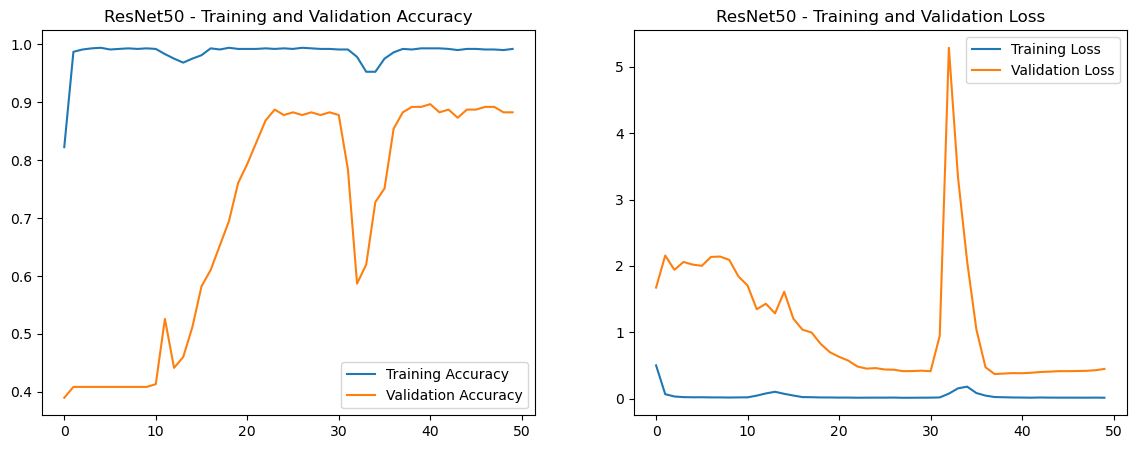

Training time for ResNet50: 5443.22431063652 seconds
Evaluating DenseNet121
1/7 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step

C:\Users\Test\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step 
Confusion Matrix
[[64  6  2]
 [ 3 85  1]
 [ 1  4 51]]
Classification Report
              precision    recall  f1-score   support

        bird       0.94      0.89      0.91        72
        fish       0.89      0.96      0.92        89
      mammal       0.94      0.91      0.93        56

    accuracy                           0.92       217
   macro avg       0.93      0.92      0.92       217
weighted avg       0.92      0.92      0.92       217



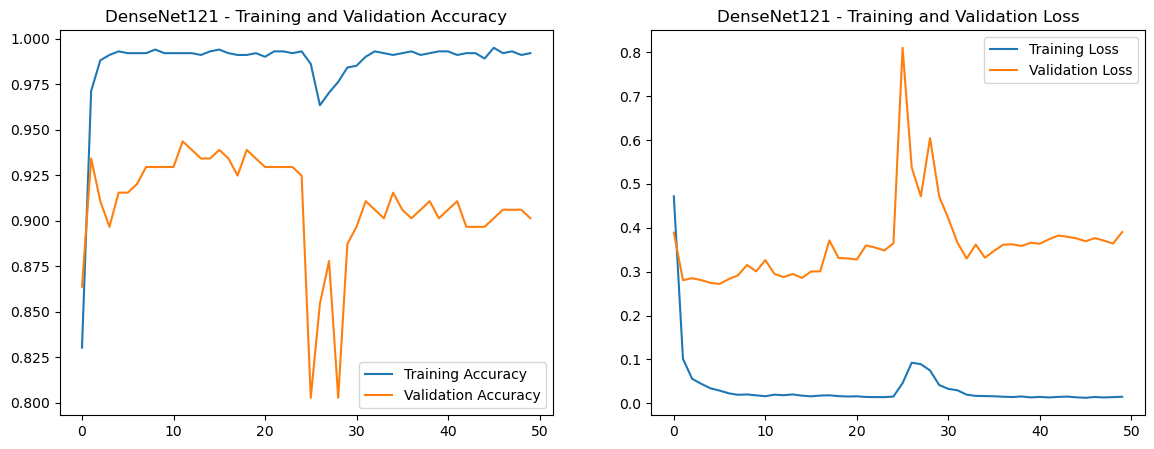

Training time for DenseNet121: 6511.572025299072 seconds
Evaluating MobileNetV3
3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

C:\Users\Test\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step
Confusion Matrix
[[ 0 72  0]
 [ 0 89  0]
 [ 0 56  0]]
Classification Report
              precision    recall  f1-score   support

        bird       0.00      0.00      0.00        72
        fish       0.41      1.00      0.58        89
      mammal       0.00      0.00      0.00        56

    accuracy                           0.41       217
   macro avg       0.14      0.33      0.19       217
weighted avg       0.17      0.41      0.24       217



C:\Users\Test\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Test\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Test\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


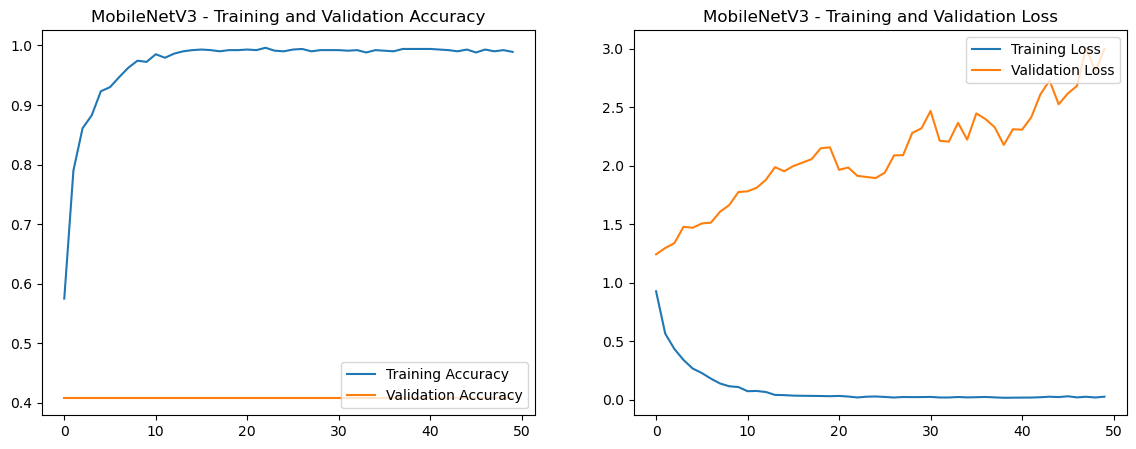

Training time for MobileNetV3: 687.8291027545929 seconds


In [6]:
# Evaluation function
def evaluate_model(model, test_generator):
    test_generator.reset()
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_generator.classes, y_pred))
    print('Classification Report')
    target_names = list(test_generator.class_indices.keys())
    print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# Plotting function
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{title} - Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Training and Validation Loss')
    plt.show()

# Evaluate and visualize each model
for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model(model, test_generator)
    plot_history(history[name], name)
    print(f"Training time for {name}: {training_times[name]} seconds")
 